In [1]:
import pandas as pd
import numpy as np
import chess 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MultiLabelBinarizer
np.complex_ = np.complex128
np.float_ = np.float64
np.string_ = np.bytes_
np.unicode_ = np.str_
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("lichess_db_puzzle.csv")

df.head(10)

,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags
0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1942,75,95,7530,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,NaN
1,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1405,74,96,30875,advantage endgame short,https://lichess.org/F8M8OS71#53,NaN
2,0008Q,8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64,e7f7 f5e5 e2f1 e5e6,1257,78,90,688,advantage endgame rookEndgame short,https://lichess.org/MQSyb3KW#127,NaN
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1080,74,87,586,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Vari...
4,000VW,r4r2/1p3pkp/p5p1/3R1N1Q/3P4/8/P1q2P2/3R2K1 b -...,g6f5 d5c5 c2e4 h5g5 g7h8 g5f6,2844,104,85,246,crushing endgame long,https://lichess.org/e9AY2m5j/black#50,NaN
5,000Vc,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6,1575,80,75,102,crushing endgame long pawnEndgame,https://lichess.org/l6AejDMO#105,NaN
6,000Zo,4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...,e5f6 e8e1 g1f2 e1f1,1353,75,86,627,endgame mate mateIn2 short,https://lichess.org/n8Ff742v#69,NaN
7,000aY,r4rk1/pp3ppp/2n1b3/q1pp2B1/8/P1Q2NP1/1PP1PP1P/...,g5e7 a5c3 b2c3 c6e7,1440,79,74,512,advantage master middlegame short,https://lichess.org/iihZGl6t#29,Benoni_Defense Benoni_Defense_Benoni-Indian_De...
8,000hf,r1bqk2r/pp1nbNp1/2p1p2p/8/2BP4/1PN3P1/P3QP1P/3...,e8f7 e2e6 f7f8 e6f7,1483,76,91,566,mate mateIn2 middlegame short,https://lichess.org/71ygsFeE/black#38,Horwitz_Defense Horwitz_Defense_Other_variations
9,000lC,3r3r/pQNk1ppp/1qnb1n2/1B6/8/8/PPP3PP/3R1R1K w ...,d1d6 d7d6 b7b6 a7b6,1408,76,94,3489,advantage hangingPiece middlegame short,https://lichess.org/vaqz2bx6#37,NaN


In [3]:
def parse_themes(theme_string):
    if isinstance(theme_string, str):
        return theme_string.split()
sample_theme = "crushing hangingPiece long middlegame"
tags = parse_themes(sample_theme)
print(tags) 

['crushing', 'hangingPiece', 'long', 'middlegame']


In [4]:
df['ParsedThemes'] = df['Themes'].apply(parse_themes)

df.head(10)

,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags,ParsedThemes
0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1942,75,95,7530,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,NaN,"[crushing, hangingPiece, long, middlegame]"
1,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1405,74,96,30875,advantage endgame short,https://lichess.org/F8M8OS71#53,NaN,"[advantage, endgame, short]"
2,0008Q,8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64,e7f7 f5e5 e2f1 e5e6,1257,78,90,688,advantage endgame rookEndgame short,https://lichess.org/MQSyb3KW#127,NaN,"[advantage, endgame, rookEndgame, short]"
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1080,74,87,586,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Vari...,"[advantage, middlegame, short]"
4,000VW,r4r2/1p3pkp/p5p1/3R1N1Q/3P4/8/P1q2P2/3R2K1 b -...,g6f5 d5c5 c2e4 h5g5 g7h8 g5f6,2844,104,85,246,crushing endgame long,https://lichess.org/e9AY2m5j/black#50,NaN,"[crushing, endgame, long]"
5,000Vc,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6,1575,80,75,102,crushing endgame long pawnEndgame,https://lichess.org/l6AejDMO#105,NaN,"[crushing, endgame, long, pawnEndgame]"
6,000Zo,4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...,e5f6 e8e1 g1f2 e1f1,1353,75,86,627,endgame mate mateIn2 short,https://lichess.org/n8Ff742v#69,NaN,"[endgame, mate, mateIn2, short]"
7,000aY,r4rk1/pp3ppp/2n1b3/q1pp2B1/8/P1Q2NP1/1PP1PP1P/...,g5e7 a5c3 b2c3 c6e7,1440,79,74,512,advantage master middlegame short,https://lichess.org/iihZGl6t#29,Benoni_Defense Benoni_Defense_Benoni-Indian_De...,"[advantage, master, middlegame, short]"
8,000hf,r1bqk2r/pp1nbNp1/2p1p2p/8/2BP4/1PN3P1/P3QP1P/3...,e8f7 e2e6 f7f8 e6f7,1483,76,91,566,mate mateIn2 middlegame short,https://lichess.org/71ygsFeE/black#38,Horwitz_Defense Horwitz_Defense_Other_variations,"[mate, mateIn2, middlegame, short]"
9,000lC,3r3r/pQNk1ppp/1qnb1n2/1B6/8/8/PPP3PP/3R1R1K w ...,d1d6 d7d6 b7b6 a7b6,1408,76,94,3489,advantage hangingPiece middlegame short,https://lichess.org/vaqz2bx6#37,NaN,"[advantage, hangingPiece, middlegame, short]"


In [5]:
from collections import Counter
all_labels = [label for labels in df["ParsedThemes"] for label in labels]
label_counter = Counter(all_labels)

In [6]:
import random
import ast

allowed_set = {"mate", "fork", "pin", "skewer", "sacrifice", "rookEndgame", "pawnEndgame", "hangingPiece", "discoveredAttack"}

def select_core_label(themes):
    """
    For a list of themes, convert any mate variants to 'mate',
    then keep only those in allowed_set.
    If multiple remain, choose one at random.
    Returns None if no allowed label is found.
    """
    selected = []
    for label in themes:
        # Merge any label containing 'mate' (case-insensitive) into "mate"
        if "mate" in label.lower():
            selected.append("mate")
        elif label in allowed_set:
            selected.append(label)
    # Remove duplicates
    selected = list(set(selected))
    return list(set(selected))

import ast
if df["ParsedThemes"].apply(lambda x: isinstance(x, str)).any():
    df["ParsedThemes"] = df["ParsedThemes"].apply(ast.literal_eval)

# Apply the function to create a new column "CoreLabel"
df["CoreLabel"] = df["ParsedThemes"].apply(select_core_label)

# Drop rows with no core label
core_tactics_df = df[df["CoreLabel"].apply(lambda x: len(x) > 0)].copy()
core_tactics_df.reset_index(drop=True, inplace=True)

# Check the result:
print(core_tactics_df[["ParsedThemes", "CoreLabel"]].head(10))
len(core_tactics_df)


                                     ParsedThemes       CoreLabel
0      [crushing, hangingPiece, long, middlegame]  [hangingPiece]
1        [advantage, endgame, rookEndgame, short]   [rookEndgame]
2          [crushing, endgame, long, pawnEndgame]   [pawnEndgame]
3                 [endgame, mate, mateIn2, short]          [mate]
4              [mate, mateIn2, middlegame, short]          [mate]
5    [advantage, hangingPiece, middlegame, short]  [hangingPiece]
6  [crushing, endgame, exposedKing, long, skewer]        [skewer]
7        [crushing, endgame, fork, master, short]          [fork]
8             [advantage, fork, long, middlegame]          [fork]
9                [advantage, endgame, pin, short]           [pin]


3016647

In [7]:
core_tactics_df.head(10)

,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags,ParsedThemes,CoreLabel
0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1942,75,95,7530,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,NaN,"[crushing, hangingPiece, long, middlegame]",[hangingPiece]
1,0008Q,8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64,e7f7 f5e5 e2f1 e5e6,1257,78,90,688,advantage endgame rookEndgame short,https://lichess.org/MQSyb3KW#127,NaN,"[advantage, endgame, rookEndgame, short]",[rookEndgame]
2,000Vc,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6,1575,80,75,102,crushing endgame long pawnEndgame,https://lichess.org/l6AejDMO#105,NaN,"[crushing, endgame, long, pawnEndgame]",[pawnEndgame]
3,000Zo,4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...,e5f6 e8e1 g1f2 e1f1,1353,75,86,627,endgame mate mateIn2 short,https://lichess.org/n8Ff742v#69,NaN,"[endgame, mate, mateIn2, short]",[mate]
4,000hf,r1bqk2r/pp1nbNp1/2p1p2p/8/2BP4/1PN3P1/P3QP1P/3...,e8f7 e2e6 f7f8 e6f7,1483,76,91,566,mate mateIn2 middlegame short,https://lichess.org/71ygsFeE/black#38,Horwitz_Defense Horwitz_Defense_Other_variations,"[mate, mateIn2, middlegame, short]",[mate]
5,000lC,3r3r/pQNk1ppp/1qnb1n2/1B6/8/8/PPP3PP/3R1R1K w ...,d1d6 d7d6 b7b6 a7b6,1408,76,94,3489,advantage hangingPiece middlegame short,https://lichess.org/vaqz2bx6#37,NaN,"[advantage, hangingPiece, middlegame, short]",[hangingPiece]
6,000qP,8/7R/8/5p2/4bk1P/8/2r2K2/6R1 w - - 7 51,f2f1 f4f3 f1e1 c2c1 e1d2 c1g1,2094,75,92,852,crushing endgame exposedKing long skewer,https://lichess.org/r4xUR6fC#101,NaN,"[crushing, endgame, exposedKing, long, skewer]",[skewer]
7,000rO,3R4/8/K7/pB2b3/1p6/1P2k3/3p4/8 w - - 4 58,a6a5 e5c7 a5b4 c7d8,1075,81,85,68,crushing endgame fork master short,https://lichess.org/tzeeBEc2#115,NaN,"[crushing, endgame, fork, master, short]",[fork]
8,0017R,r2qk2r/pp2ppbp/1n1p2p1/3Pn3/2P5/2NBBP1P/PP3P2/...,e5c4 d3c4 b6c4 d1a4 d8d7 a4c4,1688,75,96,1998,advantage fork long middlegame,https://lichess.org/ol84k0z4/black#24,Alekhine_Defense Alekhine_Defense_Other_variat...,"[advantage, fork, long, middlegame]",[fork]
9,0018S,2kr3r/pp3p2/4p2p/1N1p2p1/3Q4/1P1P4/2q2PPP/5RK1...,b7b6 d4a1 a7a5 f1c1,2630,113,91,1743,advantage endgame pin short,https://lichess.org/H1ARO2GL/black#40,NaN,"[advantage, endgame, pin, short]",[pin]


In [23]:
core_tactics_df
from tqdm import tqdm

sample = core_tactics_df.head(90000).copy()

# Extract first move from the Moves column
sample["FirstMove"] = sample["Moves"].str.split().str[0]

# Apply the first move to each FEN
updated_fens = []
for fen, move in tqdm(zip(sample["FEN"], sample["FirstMove"]), total=len(sample)):
    try:
        board = chess.Board(fen)
        board.push_uci(move)
        updated_fens.append(board.fen())
    except:
        updated_fens.append(None)

# Save result in sample DataFrame
sample["FEN_after_first_move"] = updated_fens

# Drop failed rows
sample = sample.dropna(subset=["FEN_after_first_move"]).reset_index(drop=True)

print(sample.head(20))
len(sample)


from collections import Counter
from itertools import chain

all_labels = list(chain.from_iterable(sample["CoreLabel"]))
label_counts = Counter(all_labels)

# View it as a sorted DataFrame
import pandas as pd
label_counts_df = pd.DataFrame(label_counts.items(), columns=["Label", "Count"]).sort_values(by="Count", ascending=False)
display(label_counts_df)

100%|██████████| 90000/90000 [00:17<00:00, 5287.15it/s]


   PuzzleId                                                FEN  \
0     00008  r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...   
1     0008Q       8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64   
2     000Vc             8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53   
3     000Zo  4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...   
4     000hf  r1bqk2r/pp1nbNp1/2p1p2p/8/2BP4/1PN3P1/P3QP1P/3...   
5     000lC  3r3r/pQNk1ppp/1qnb1n2/1B6/8/8/PPP3PP/3R1R1K w ...   
6     000qP            8/7R/8/5p2/4bk1P/8/2r2K2/6R1 w - - 7 51   
7     000rO          3R4/8/K7/pB2b3/1p6/1P2k3/3p4/8 w - - 4 58   
8     0017R  r2qk2r/pp2ppbp/1n1p2p1/3Pn3/2P5/2NBBP1P/PP3P2/...   
9     0018S  2kr3r/pp3p2/4p2p/1N1p2p1/3Q4/1P1P4/2q2PPP/5RK1...   
10    001Hi  6k1/pp1r1pp1/1qp1p2p/4P2P/5Q2/1P4R1/P1Pr1PP1/R...   
11    001Wz  4r1k1/5ppp/r1p5/p1n1RP2/8/2P2N1P/2P3P1/3R2K1 b...   
12    001XA  1qr2rk1/pb2bppp/8/8/2p1N3/P1Bn2P1/2Q2PBP/1R3RK...   
13    001aK  6k1/5p2/4p3/P1B5/2P4P/4Pnp1/Rb1rN3/5K2 b - - 1 33   
14    001c

,Label,Count
3,mate,39734
5,fork,19563
7,sacrifice,10231
6,pin,8791
8,discoveredAttack,7644
1,rookEndgame,7130
0,hangingPiece,5862
2,pawnEndgame,4503
4,skewer,3168


In [58]:
import pandas as pd
from collections import defaultdict
import random

# Target per label
target_per_label = 5555

# Group samples by label
label_to_indices = defaultdict(list)
for idx, labels in enumerate(sample["CoreLabel"]):
    for label in labels:
        label_to_indices[label].append(idx)

# Sample indices per label
balanced_indices = set()
for label, indices in label_to_indices.items():
    if len(indices) >= target_per_label:
        selected = random.sample(indices, target_per_label)
    else:
        selected = random.choices(indices, k=target_per_label)  # oversample if needed
    balanced_indices.update(selected)

# Extract balanced DataFrame
sample_balanced = sample.loc[list(balanced_indices)].drop_duplicates(subset=["PuzzleId"]).reset_index(drop=True)


print("Balanced sample shape:", sample_balanced.shape)

sample_balanced.head(10)
from collections import Counter
from itertools import chain

all_labels = list(chain.from_iterable(sample_balanced["CoreLabel"]))
label_counts = Counter(all_labels)

import pandas as pd
label_counts_df = pd.DataFrame(label_counts.items(), columns=["Label", "Count"]).sort_values(by="Count", ascending=False)
display(label_counts_df)

Balanced sample shape: (41490, 14)


,Label,Count
5,mate,11125
1,fork,7077
3,sacrifice,6678
2,pin,6016
4,discoveredAttack,5831
7,rookEndgame,5768
0,hangingPiece,5588
8,pawnEndgame,3197
6,skewer,2734


In [59]:
piece_to_channel = {
    'P': 0, 'N': 1, 'B': 2, 'R': 3, 'Q': 4, 'K': 5,
    'p': 6, 'n': 7, 'b': 8, 'r': 9, 'q': 10, 'k': 11
}

In [60]:
# def fen_to_board_array(fen):
#     """
#     Converts a FEN string into an 8x8x12 numpy array.
#     Each square is one-hot encoded into 12 channels representing the piece types.
#     """
#     board = chess.Board(fen)
#     board_array = np.zeros((8, 8, 12), dtype=np.float32)
    
#     for square, piece in board.piece_map().items():
#         row = square // 8   # row: 0 (top) to 7 (bottom)
#         col = square % 8
#         channel = piece_to_channel[piece.symbol()]
#         board_array[row, col, channel] = 1.0
    
#     return board_array

# example_fen = sample["FEN_after_first_move"].iloc[0]
# print("Example FEN:", example_fen)
# print("Board array shape:", fen_to_board_array(example_fen).shape)
def fen_to_board_array(fen):
    """
    Converts a FEN string into an 8x8x19 numpy array.
    Channels:
      0-11: Basic one-hot encoding for pieces.
      12: Attacked by White (1 if square is attacked by at least one white piece).
      13: Attacked by Black.
      14: White kingside castling rights (entire plane: 1 if available, else 0).
      15: White queenside castling rights.
      16: Black kingside castling rights.
      17: Black queenside castling rights.
      18: Side-to-move (entire plane: 1 if White, 0 if Black).
    """
    board = chess.Board(fen)
    board_array = np.zeros((8, 8, 19), dtype=np.float32)
    # --- 8x8x12 one-hot encoding for pieces ---
    for square, piece in board.piece_map().items():
        row = square // 8
        col = square % 8
        channel = piece_to_channel[piece.symbol()]
        board_array[row, col, channel] = 1.0
    # --- Attacked squares channels ---
    # Channel 12: attacked by white; Channel 13: attacked by black.
    for square in chess.SQUARES:
        row = square // 8
        col = square % 8
        if board.is_attacked_by(chess.WHITE, square):
            board_array[row, col, 12] = 1.0
        if board.is_attacked_by(chess.BLACK, square):
            board_array[row, col, 13] = 1.0

    # --- Castling rights channels ---
    # Channels 14-17: constant planes for castling rights.
    castling_channels = [14, 15, 16, 17]
    # White kingside
    flag = 1.0 if board.has_kingside_castling_rights(chess.WHITE) else 0.0
    board_array[:, :, 14] = flag
    # White queenside
    flag = 1.0 if board.has_queenside_castling_rights(chess.WHITE) else 0.0
    board_array[:, :, 15] = flag
    # Black kingside
    flag = 1.0 if board.has_kingside_castling_rights(chess.BLACK) else 0.0
    board_array[:, :, 16] = flag
    # Black queenside
    flag = 1.0 if board.has_queenside_castling_rights(chess.BLACK) else 0.0
    board_array[:, :, 17] = flag

    # --- Side-to-move channel ---
    # Channel 18: fill the plane with 1 if White's turn, else 0.
    side = 1.0 if board.turn == chess.WHITE else 0.0
    board_array[:, :, 18] = side

    return board_array

example_fen = sample_balanced["FEN_after_first_move"].iloc[0]
refined_board = fen_to_board_array(example_fen)
print("Example FEN:", example_fen)
print("Refined board array shape:", refined_board.shape)

Example FEN: r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2b1/PqP3PP/7K w - - 0 25
Refined board array shape: (8, 8, 19)


In [61]:
X_list = []
for fen in tqdm(sample_balanced["FEN_after_first_move"], desc="Converting FENs to board arrays"):
    board_array = fen_to_board_array(fen)
    X_list.append(board_array)
X = np.array(X_list)
print("X shape:", X.shape)

# Prepare the labels using the full RefinedThemes column (all tactical motifs)
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(sample_balanced["CoreLabel"])
print("y shape:", y.shape)
print("Label space (all parsed themes):", mlb.classes_)

Converting FENs to board arrays: 100%|██████████| 41490/41490 [00:14<00:00, 2806.99it/s]


X shape: (41490, 8, 8, 19)
y shape: (41490, 9)
Label space (all parsed themes): ['discoveredAttack' 'fork' 'hangingPiece' 'mate' 'pawnEndgame' 'pin'
 'rookEndgame' 'sacrifice' 'skewer']


In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(8, 8, 19), padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(mlb.classes_), activation='sigmoid') 
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/Users/faris/Desktop/AllProjects/chesspuzzlelearner/backend/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 32)       │         5,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 8, 8, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 549,961 (2.10 MB)

 Trainable params: 549,769 (2.10 MB)

 Non-trainable params: 192 (768.00 B)

In [63]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test),callbacks=[early_stop])


Epoch 1/15
1038/1038 ━━━━━━━━━━━━━━━━━━━━ 35s 31ms/step - accuracy: 0.2936 - loss: 0.4009 - val_accuracy: 0.3924 - val_loss: 0.3004
Epoch 2/15
1038/1038 ━━━━━━━━━━━━━━━━━━━━ 36s 35ms/step - accuracy: 0.3832 - loss: 0.3126 - val_accuracy: 0.4050 - val_loss: 0.2936
Epoch 3/15
1038/1038 ━━━━━━━━━━━━━━━━━━━━ 39s 37ms/step - accuracy: 0.4046 - loss: 0.2991 - val_accuracy: 0.4059 - val_loss: 0.2892
Epoch 4/15
1038/1038 ━━━━━━━━━━━━━━━━━━━━ 39s 38ms/step - accuracy: 0.4242 - loss: 0.2887 - val_accuracy: 0.4275 - val_loss: 0.2817
Epoch 5/15
1038/1038 ━━━━━━━━━━━━━━━━━━━━ 39s 37ms/step - accuracy: 0.4339 - loss: 0.2795 - val_accuracy: 0.4394 - val_loss: 0.2796
Epoch 6/15
1038/1038 ━━━━━━━━━━━━━━━━━━━━ 38s 37ms/step - accuracy: 0.4535 - loss: 0.2712 - val_accuracy: 0.4513 - val_loss: 0.2763
Epoch 7/15
1038/1038 ━━━━━━━━━━━━━━━━━━━━ 38s 37ms/step - accuracy: 0.4706 - loss: 0.2618 - val_accuracy: 0.4599 - val_loss: 0.2695
Epoch 8/15
1038/1038 ━━━━━━━━━━━━━━━━━━━━ 38s 37ms/step - accuracy: 0.4856 -

In [72]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.35).astype(int)

from sklearn.metrics import f1_score, hamming_loss

f1 = f1_score(y_test, y_pred_binary, average='micro')
h_loss = hamming_loss(y_test, y_pred_binary)

print("F1 Score (micro):", f1)
print("Hamming Loss:", h_loss)

true_labels = mlb.inverse_transform(y_test)
pred_labels = mlb.inverse_transform(y_pred_binary)

print("\nSample Predictions:")
for i in range(10):
    print(f"Sample #{i+1}")
    print("  True Labels:     ", true_labels[i])
    print("  Predicted Labels:", pred_labels[i])
    print()

260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
F1 Score (micro): 0.5291626672689289
Hamming Loss: 0.11166010551404622

Sample Predictions:
Sample #1
  True Labels:      ('discoveredAttack', 'sacrifice')
  Predicted Labels: ('mate', 'sacrifice')

Sample #2
  True Labels:      ('hangingPiece',)
  Predicted Labels: ('hangingPiece',)

Sample #3
  True Labels:      ('mate', 'pin')
  Predicted Labels: ()

Sample #4
  True Labels:      ('pin',)
  Predicted Labels: ()

Sample #5
  True Labels:      ('rookEndgame',)
  Predicted Labels: ('rookEndgame',)

Sample #6
  True Labels:      ('pawnEndgame',)
  Predicted Labels: ('pawnEndgame',)

Sample #7
  True Labels:      ('fork', 'sacrifice')
  Predicted Labels: ('fork', 'skewer')

Sample #8
  True Labels:      ('discoveredAttack',)
  Predicted Labels: ('discoveredAttack',)

Sample #9
  True Labels:      ('fork', 'pin', 'sacrifice')
  Predicted Labels: ()

Sample #10
  True Labels:      ('mate', 'rookEndgame')
  Predicted Labels: ('mate', 'rookEndgame')



In [77]:
from sklearn.metrics import classification_report, precision_score, recall_score

# y_test and y_pred_binary both have shape (n_samples, 9) with 0/1 entries
# 'labels' or 'target_names' = ["mate", "fork", "pin", ...]

precision_micro = precision_score(y_test, y_pred_binary, average='micro')
recall_micro = recall_score(y_test, y_pred_binary, average='micro')
precision_macro = precision_score(y_test, y_pred_binary, average='macro')
recall_macro = recall_score(y_test, y_pred_binary, average='macro')

print("Precision (micro):", precision_micro)
print("Recall (micro):", recall_micro)
print("Precision (macro):", precision_macro)
print("Recall (macro):", recall_macro)

print(classification_report(y_test, y_pred_binary, target_names=labels))

Precision (micro): 0.6789336424224862
Recall (micro): 0.4335276158756592
Precision (macro): 0.6225982455156186
Recall (macro): 0.4364400268687369
                  precision    recall  f1-score   support

            mate       0.48      0.17      0.25      1160
            fork       0.46      0.10      0.17      1382
             pin       0.61      0.34      0.44      1139
          skewer       0.62      0.69      0.66      2209
       sacrifice       1.00      0.99      0.99       660
     rookEndgame       0.42      0.07      0.11      1225
     pawnEndgame       0.95      1.00      0.97      1142
    hangingPiece       0.52      0.30      0.38      1316
discoveredAttack       0.54      0.26      0.35       576

       micro avg       0.68      0.43      0.53     10809
       macro avg       0.62      0.44      0.48     10809
    weighted avg       0.60      0.43      0.47     10809
     samples avg       0.44      0.43      0.43     10809



/Users/faris/Desktop/AllProjects/chesspuzzlelearner/backend/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


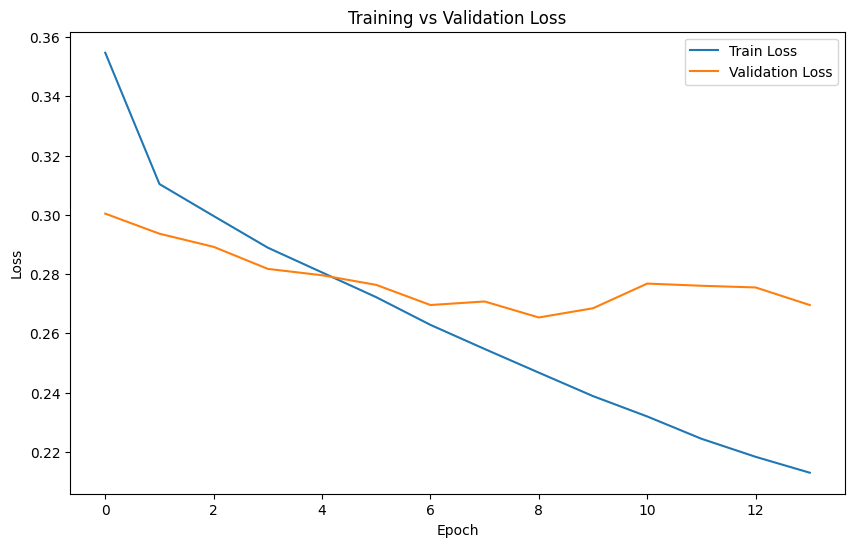

In [69]:
import matplotlib.pyplot as plt

# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


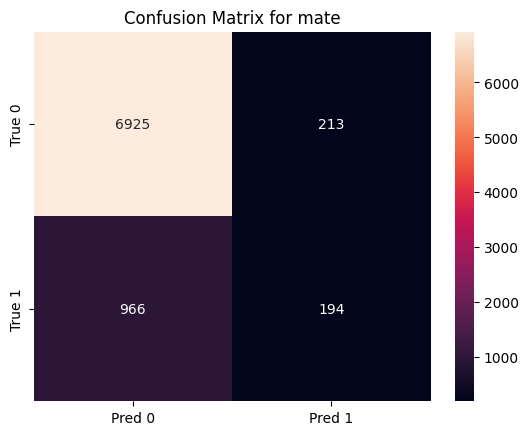

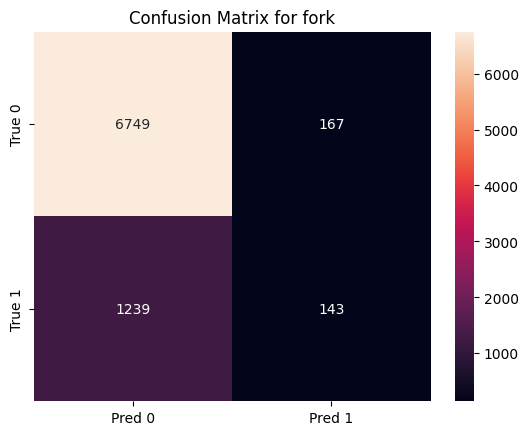

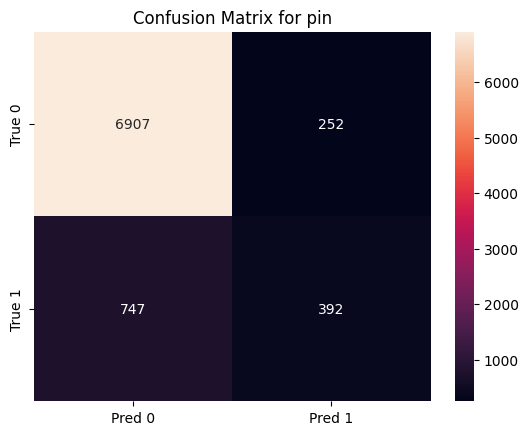

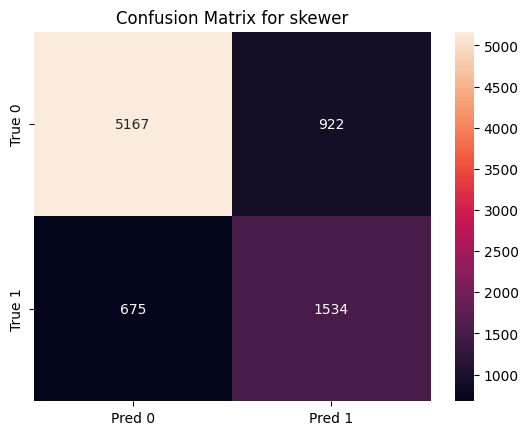

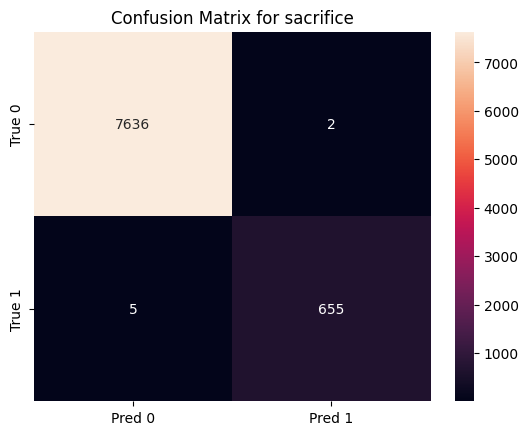

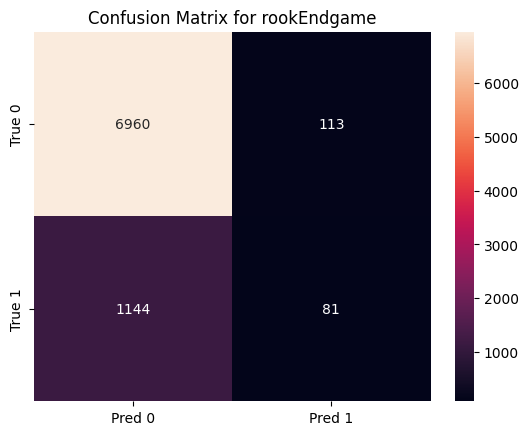

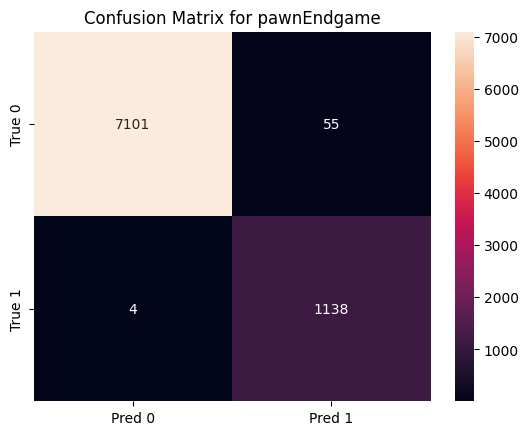

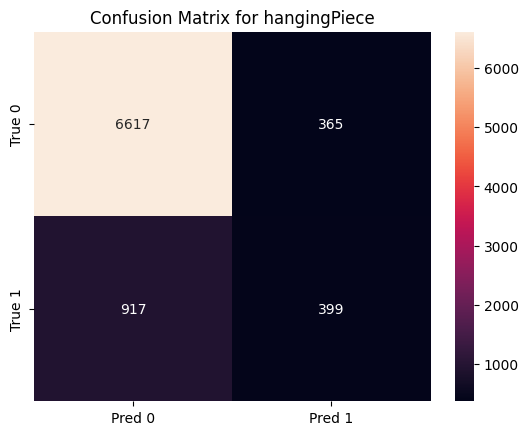

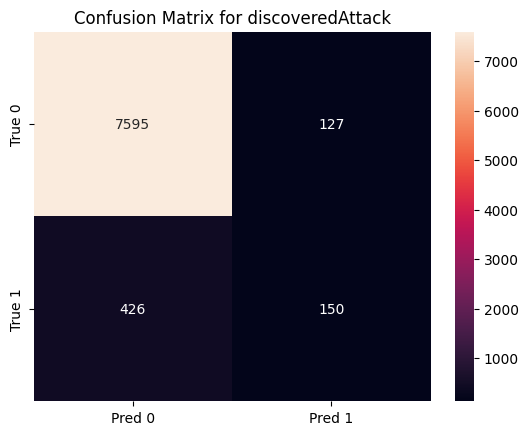

In [78]:
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns; import matplotlib.pyplot as plt

cm = multilabel_confusion_matrix(y_test, y_pred_binary)
for i, label in enumerate(labels):
    sns.heatmap(cm[i], annot=True, fmt="d", xticklabels=["Pred 0", "Pred 1"], yticklabels=["True 0", "True 1"])
    plt.title(f'Confusion Matrix for {label}')
    plt.show()
